# Solution: temperature and precipitation data

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Temperature

**Compute the mean temperature $\overline{T}$ in °C. Plot it.**

**Compute the monthly average temperature for each month $\overline{T_M}$ (annual cycle). I expect a variable of dimensions (month: 12, latitude: 241, longitude: 480).** Hint: remember the ``.groupby()`` command we learned in the lesson. **Now plot the average monthly temperature range, i.e. $\overline{T_M}max$ - $\overline{T_M}min$ on a map**.

**Where is the range of monthly temperature highest? Note the latitudinal differences. Is the variability higher over land or over oceans? Why?**

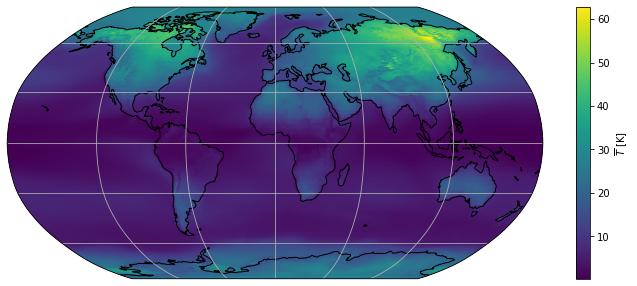

In [3]:
# Solution
# Annual cycle
t2_cycle = ds.t2m.groupby('time.month').mean() - 273.15
# Plot
ax = plt.axes(projection=ccrs.Robinson())
(t2_cycle.max(dim='month') - t2_cycle.min(dim='month')).plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                             cbar_kwargs={'label':'$\overline{T}$ [K]'}) 
ax.coastlines(); ax.gridlines(); 

**Compute the zonal mean temperature $\overline{\left[ T \right]}$. Plot it. At what latitudes is the zonal average temperature equal to 0°C? Describe the differences between North and South. Can you explain them easily? Add $\left[\overline{T_{January}}\right]$ and $\left[\overline{T_{July}}\right]$ to the plot.**

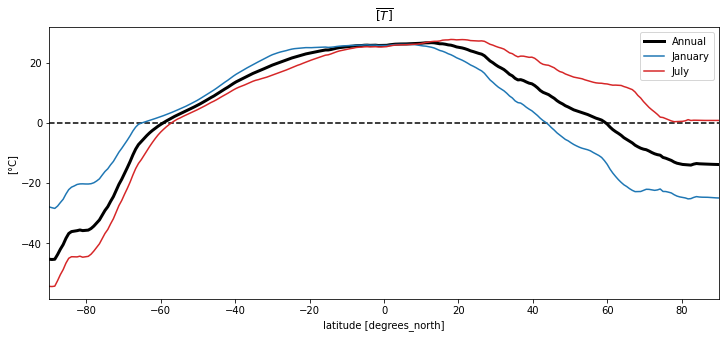

In [4]:
# Solution
t2_tavg.mean(dim='longitude').plot(label='Annual', linewidth=3, c='k');
t2_cycle.sel(month=1).mean(dim='longitude').plot(label='January', c='C0');
t2_cycle.sel(month=7).mean(dim='longitude').plot(label='July', c='C3');
plt.legend();
plt.title(r'$\overline{\left[ T \right]}$');
plt.hlines(0, -90, 90, linestyle='--', color='k');
plt.xlim(-90, 90);
plt.ylabel('[°C]');

Similarly to the decomposition in time, geophysical fields can also be decomposed zonally:

$A = \left[ A \right] + A^{*}$

Where $\left[ A \right]$ is the zonal average and $A^{*}$ the departure from the zonal average.

**Verify that for any field A:**
1. $\overline{A^{*}} = \overline{A} - \left[ \overline{A} \right]$  
2. $A = \left[ \overline{A} \right] + \left[ A' \right] + \overline{A^{*}} + A'^{*}$ 

**Compute $\overline{T^{*}}$ (use eq. 1 above), and plot it on a map. Discuss**

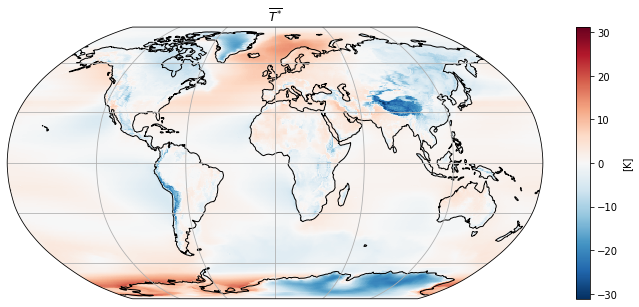

In [5]:
# Solution
t_avg_dep = t2_tavg - t2_tavg.mean(dim='longitude')
ax = plt.axes(projection=ccrs.Robinson())
t_avg_dep.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'[K]'}) 
ax.set_title('$\overline{T^{*}}$')
ax.coastlines(); ax.gridlines(); 

**Compute the zonal mean temperature over land $\overline{\left[ T_{Land} \right]}$ and over oceans $\overline{\left[ T_{Oceans} \right]}$ and plot them both on the same plot. Discuss.**

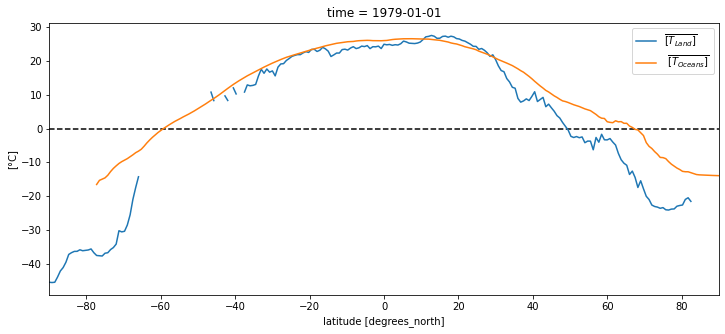

In [6]:
# Solution
dsi = xr.open_dataset('../data/ERA5_LowRes_Invariant.nc')
t2_avg_land = t2_tavg.where(dsi.lsm == 1).mean(dim='longitude')
t2_avg_ocean = t2_tavg.where(dsi.lsm == 0).mean(dim='longitude')
t2_avg_land.plot(label=r'$\overline{\left[ T_{Land} \right]}$')
t2_avg_ocean.plot(label=r' $\overline{\left[ T_{Oceans} \right]}$')
plt.legend(loc='best');
plt.hlines(0, -90, 90, linestyle='--', color='k');
plt.xlim(-90, 90);
plt.ylabel('[°C]');

## Precipitation

Open the precipitation file and explore it. The units of monthly precipitation are wrongly labeled (unfortunately). They should read: **m per day**.

In [7]:
ds = xr.open_dataset('../data/ERA5_LowRes_Monthly_tp.nc')
ds.tp

<xarray.DataArray 'tp' (time: 480, latitude: 241, longitude: 480)>
[55526400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Attributes:
    units:      m
    long_name:  Total precipitation

**Compute the average total annual precipitation (average precipitation over a year, in mm yr$^{-1}$) and store it in a variable called "annual_prcp". Plot it.**

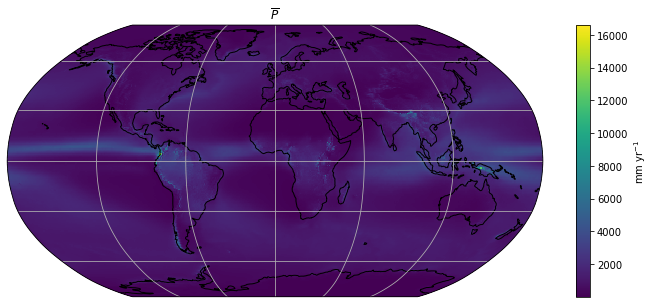

In [8]:
# Solution
annual_prcp = ds.tp.mean(dim='time') * 365.25 * 1000
ax = plt.axes(projection=ccrs.Robinson())
annual_prcp.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm yr$^{-1}$'}) 
ax.set_title('$\overline{P}$')
ax.coastlines(); ax.gridlines(); 

**Draw a new plot of "annual_prcp", this time with a new colormap ('YlGnBu') and with the following discrete levels specified: [50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000]. Now have a look at the patterns again.**

**Using your knowledge from the lecture which didn't take place yet ;-), try to answer questions such as:**
- why are the oceans (mostly) dryer than land in the subtropics?
- this was not covered in the lecture, but why is there only one large desert (in Africa) while other continents at the same latitute are rather wet?
- why are the eastern subtropical oceans dryer than in their western part? Do all three oceans have similar patterns for precipitation?
- where does it fall more than 3000 mm precipitation a year? Less than 50 mm precipitation a year?
- Note that it could be easy to use the ".where()" function to highlight these areas easily. Optional: can you come up with a plot showing them on the map?

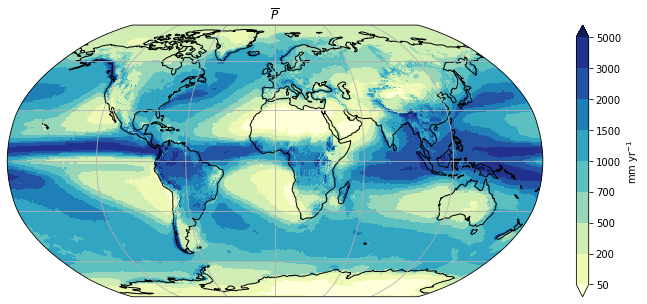

In [9]:
# Solution
ax = plt.axes(projection=ccrs.Robinson())
annual_prcp.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm yr$^{-1}$'}, 
                 levels=[50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000], cmap='YlGnBu') 
ax.set_title('$\overline{P}$')
ax.coastlines(); ax.gridlines(); 

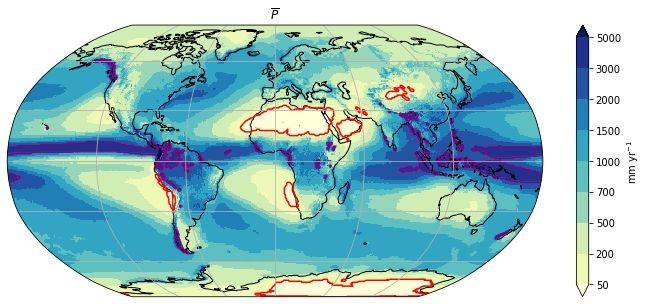

In [10]:
# Solution
# Mark some areas
ax = plt.axes(projection=ccrs.Robinson())
annual_prcp.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm yr$^{-1}$'}, 
                 levels=[50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000], cmap='YlGnBu')

# Mask 1
mask = annual_prcp.where(annual_prcp > 3000, 0)
mask.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.5], colors=['purple'])
# Mask 2
mask = annual_prcp.where(annual_prcp < 50, 0)
mask.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=[0.5], colors=['red'])

ax.set_title('$\overline{P}$')
ax.coastlines(); ax.gridlines();

**Plot the average precipitation in January on a map. Do the same with precipitation in July, and choose the same levels for both maps in order to compare them. Discuss.**

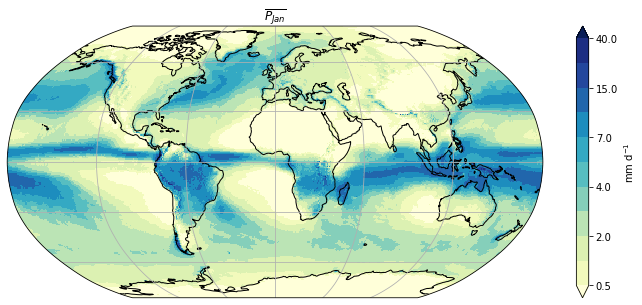

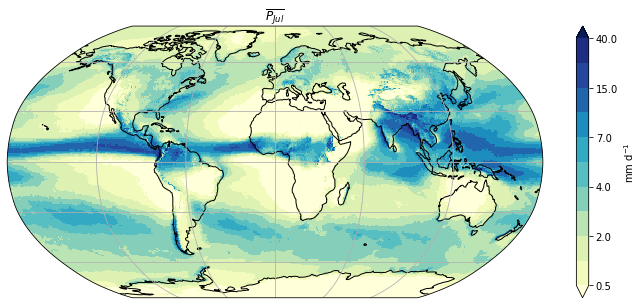

In [11]:
# Solution
prcp_cycle = ds.tp.groupby('time.month').mean() * 1000

pm = prcp_cycle.sel(month=1)
ax = plt.axes(projection=ccrs.Robinson())
pm.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm d$^{-1}$'}, 
        levels=[0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 40], cmap='YlGnBu') 
ax.set_title('$\overline{P_{Jan}}$')
ax.coastlines(); ax.gridlines(); 

plt.figure()
pm = prcp_cycle.sel(month=7)
ax = plt.axes(projection=ccrs.Robinson())
pm.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm d$^{-1}$'},
        levels=[0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 40], cmap='YlGnBu') 
ax.set_title('$\overline{P_{Jul}}$')
ax.coastlines(); ax.gridlines(); 